## Exercice 1 : décortiquer un problème pour des publications

<details>
    <summary>** Voir la solution de la question 1 **</summary>

*Proposition de correction :*    
    
1. Interroger la base de données pour avoir accès la liste des publications du laboratoire, la limiter à 300 identifiants que l'on peut mettre dans une liste `list_publications` par exemple.
2. Écrire une fonction qui tire des nombres aléatoires en vérifiant qu'ils n'ont pas déjà été tirés : pour cela, 
     * faire une liste `random_numbers` vide
     * tirer un nombre aléatoire compris entre 0 et 299
     * vérifier que le nombre tiré n'est pas déjà dans `random_numbers` (sinon on recommence)
    
   On peut aussi faire une liste contenant les chiffres compris entre 0 et 299, la mélanger puis ne garder que les 5 premiers éléments pour former `random_numbers`.
3. afficher les éléments de `list_publications` ayant les indices fournis par la liste `random_numbers`
</details>
<details>
    <summary>** Voir la solution de la question 2 **</summary>

*Proposition de correction :*    
    
1. Interroger la base de données pour avoir accès la liste des publications que l'on peut mettre dans une liste `list_publications` par exemple.
2. Créer une liste `pair_authors` qui va stocker 3 informations : `author1`, `author2` et `common_publications` 
3. Écrire une fonction qui pour chaque élément de la liste `list_publications`:
    * interroge la base pour avoir accès à la publication que l'on peut stocker dans `publication`
    * parcourir la liste des auteurs `list_authors` de `publication`
    * regarder si l'auteur a une de ses affiliations qui est le laboratoire concerné, si c'est le cas, le placer dans une liste `authors_affiliated`
    * une fois tous les auteurs de la publication analysés, s'il y a plus de deux auteurs affiliés : faire une double boucle imbriquée sur deux indices `i1` et `i2` (i1 allant de 0 à la taille de la liste `authors_affiliated`-1) et i2 allant de i1+1 à la taille de la liste `authors_affiliated`-1. Pour chaque paire, regarder si elle existe déjà (en faisant attention sur le fait que l'ordre ne correspond peut-être pas à celui donné dans `pair_authors`) 
            * si les deux auteurs coincident avec un élément de `pair_authors`, alors on ajoute le DOI à la liste `common_publications`.
        * si les deux auteurs ne sont pas dans la liste, alors on les ajoute à `pair_authors`
    
L'algorithme est ici grossier, il pourrait être intéressant de stocker de manière ordonnée les auteurs (par exemple ordre alphabétique). Faire un tri alphabétique de `authors_affiliated` pour ensuite simplifier le test d'existance dans la base de donnée.
    
On pourrait également stocker les listes `authors_affiliated` pour chaque publication d'un côté, la liste des auteurs ayant des co-auteurs de l'autre puis faire l'analyse à la fin pour toutes les paires possibles.
</details>



# Exercice 2

In [1]:
def count_base_dna(dna, base):
    """
    Counts the number of occurence of `base` (str) in `dna` (str)
    """
    i = 0  # counter
    for char in dna:
        if char == base:
            i += 1
    return i


dna = "ATGCGGACCTAT"
base = "C"
n = count_base_dna(dna, base)
# or (new) format string syntax
print("{base} appears {n} times in {dna}".format(base=base, n=n, dna=dna))

C appears 3 times in ATGCGGACCTAT


# Exercice 3

Voici un exemple de correction en français 

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Voici un exemple de code qui prend la valeur du signal Is mesuré pour une gamme étalon 
dont les concentrations initiales Cs sont connues. Ensuite, on calcule l'absorbance définie comme :
$$A = - \log\left(\dfrac{I}{I_0}\right) $$ où I0 est l'absorbance du blanc. 

Ayant deux points, on extrait ensuite la droite affine passant par ces deux points 
pour avoir la réponse du détecteur.
"""

import numpy as np


def calc_absorbance(I, I0):
    """
    Calcul de l'absorbance
    - I est l'intensité lumineuse en sortie de l'échantillon (float)
    - I0 est l'intensité lumineuse pour le blanc (float)
    retourne l'absorbance (float)
    """
    return -np.log(I / I0)


def calc_droite(Abs, Cs):
    """
    Calcul de la pente et l'ordonnée à l'origine à partir de deux points
    - Abs : liste des absorbances de longueur 2
    - Cs : liste des concentrations de longueur 2
    retourne la pente et l'ordonnée à l'origine (tuple)
    """
    a = (Abs[1] - Abs[0]) / (Cs[1] - Cs[0])
    b = Abs[1] - a * Cs[1]
    return a, b  # slope, intercept


if __name__ == "__main__":
    # Intensité lumineuse pour le blanc
    I0 = 986
    # Intensités brutes en sortie du détecteur
    Is = [611, 281]
    # Liste qui contiendra les absorbances
    Abs = []
    # Valeurs des concentrations exprimée en mmol/L
    Cs = [2, 4]

    # Calcul de l'absorbance
    for I in Is:
        Abs.append(calc_absorbance(I, I0))

    # Calcul des paramètres de la droite affine
    droite = calc_droite(Abs, Cs)

    print("pente : {}, ordonnée à l'origine : {}".format(*droite))

pente : 0.38837114491892477, ordonnée à l'origine : -0.29818289440680945


# Exercice 4

Le code un minimum fonctionnel qui ne corrige pas les erreurs de conception mais est exécutable et donne un résultat presque correct.

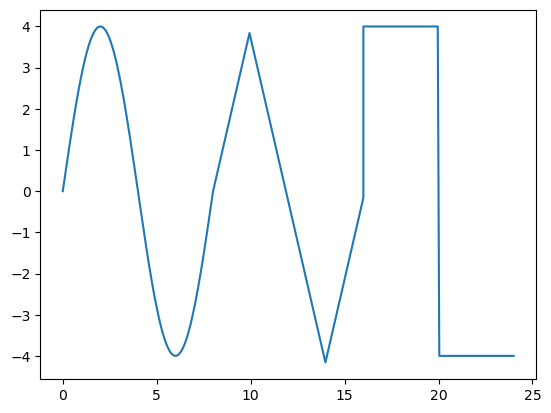

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Création de signaux périodiques

On crée un signal périodique, celui-ci sera ajouté à la suite des listes
`ts` et `ys` si jamais ces deux listes sont non vides, sinon on doit retourner une période.

Le but est ici d'avoir à la suite un signal sinusoïdal suivi d'un signal triangulaire suivi d'un signal carré.
Le signal final doit être continu (excepté aux discontinuités du signal carré).
"""

#### Bad mauvais import de l'alias, du coup les fonctions dans le namespace numpy ne fonctionnent pas
#### en général lié à un mauvais copier coller depuis internet
# $$# import numpy
#### Good
import numpy as np  # ££$


# import de librairie pour avoir un aperçu du résultat,
# PAS de bug dans les deux lignes ci-dessous
import matplotlib as mpl
import matplotlib.pyplot as plt

# $$# def make_sinusoid(amplitude, period=1, steps=100):
def make_sinusoid(amplitude, period=1, steps=100, ts=None, ys=None):  # ££$
    """
    crée un signal sinusoïdal, retourne deux listes :
    - une liste avec les abscisses temporelles,
    - l'autre avec le signal
    ces deux listes sont ajoutées aux listes `ts` et `ys`,
    avec un décalage de l'abscisse temporelle pour le temps si nécessaire

    Paramètres :
    - amplitude (float) : amplitude du signal
    - period (float) : période du signal
    - steps (int) : nombre de pas pour l'échantillonage de la fonction
    - ts (list) :  liste à laquelle on va ajouter le signal
    """

    #### GOOD : initialisation d'objet mutables au sein de la fonction pour des arguments optionnels
    if ts is None:  # ££$
        ts = []  # ££$
    if ys is None:  # ££$
        ys = []  # ££$

    #### Bad en trop => conflit de nom de variable dans deux namespaces différents
    #### en déclarant ts ici, on créé une variable interne à la fonction, ce qui fait
    #### que le extend va porter sur la variable interne à la fonction et pas la variable globale
    # $$# ts = list(np.linspace(0,period,steps))

    # création de l'ensemble des abscisses temporelles
    # la fonction linspace va créer steps points régulièrement espacés entre 0 et period
    tss = np.linspace(0, period, steps)

    # Calcul de l'amplitude pour chacun des pas de temps
    #### Good
    amplitudes = amplitude * np.sin(tss * 2 * np.pi / period)  # ££$
    #### Bad : oubli de la pulsation
    # $$# amplitudes = amplitude * np.sin(tss)

    #### Good : fait le shift
    if len(ts) > 0:  # ££$
        tss += max(ts)  # ££$

    ts.extend(list(tss))
    ys.extend(list(amplitudes))

    #### Bad : pas de valeur retour de la fonction
    return tss, amplitudes  # ££$


# $$# def make_triangle(amplitude, period=1, steps=100):
def make_triangle(amplitude, period=1, steps=100, ts=None, ys=None):  # ££$
    """
    crée un signal triangulaire, retourne deux listes :
    - une liste avec les abscisses temporelles,
    - l'autre avec le signal
    ces deux listes sont ajoutées aux listes `ts` et `ys`,
    avec un décalage de l'abscisse temporelle pour le temps si nécessaire

    Paramètres :
    - amplitude (float) : amplitude du signal
    - period (float) : période du signal
    - steps (int) : nombre de pas pour l'échantillonage de la fonction
    - ts (list) :  liste à laquelle on va ajouter le signal
    """

    if ts is None:  # ££$
        ts = []  # ££$
    if ys is None:  # ££$
        ys = []  # ££$

    # calcul de la pente associée au signal qui sera l'incrément entre deux pas de temps
    slope = 4 * amplitude / steps

    # création de l'ensemble des abscisses temporelles
    # la fonction linspace va créer steps points régulièrement espacés entre 0 et period
    tss = np.linspace(0, period, steps)
    # amplitude du signal correspondant à chaque abscisse
    amplitudes = []

    # indice correspondant au pas de temps
    current_step = 1  # ££$
    # $$# current_step = 0
    amplitudes.append(0)  # ££$
    current_amplitude = 0
    """
    on fait un signal triangulaire découpé en 4 morceaux :
    - lors du premier quart de période on incrémente d'une valeur égale à la pente
    - sur les deux quarts de période suivants on soustrait d'une valeur égale à la pente
    - lors du dernier quart de période on incrémente d'une valeur égale à la pente
    """
    while current_step < steps:
        if current_step < steps // 4:
            current_amplitude += slope
            amplitudes.append(current_amplitude)
        elif current_step < 3 * steps // 4:
            current_amplitude -= slope
            amplitudes.append(current_amplitude)
        else:
            current_amplitude += slope
            amplitudes.append(current_amplitude)
        #### BAD :  non bouclage d'un while => boucle infinie
        current_step += 1  # ££$
    # $$# current_step += 1
    if len(ts) > 0:  # ££$
        tss += max(ts)  # ££$

    ts.extend(tss)
    ys.extend(list(amplitudes))

    #### Bad : pas de valeur retour de la fonction
    return tss, amplitudes  # ££$


# $$# def make_square(amplitude, period=1, steps=100):
def make_square(amplitude, period=1, steps=100, ts=None, ys=None):  # ££$
    """
    crée un signal rectangulaire, retourne deux listes :
    - une liste avec les abscisses temporelles,
    - l'autre avec le signal
    ces deux listes sont ajoutées aux listes `ts` et `ys`,
    avec un décalage de l'abscisse temporelle pour le temps si nécessaire

    Paramètres :
    - amplitude (float) : amplitude du signal
    - period (float) : période du signal
    - steps (int) : nombre de pas pour l'échantillonage de la fonction
    - ts (list) :  liste à laquelle on va ajouter le signal
    """
    #### GOOD : initialisation d'objet mutables au sein de la fonction pour des arguments optionnels
    if ts is None:  # ££$
        ts = []  # ££$
    if ys is None:  # ££$
        ys = []  # ££$
    # création de l'ensemble des abscisses temporelles
    tss = np.linspace(0, period, steps)
    amplitudes = []
    for step in range(steps):
        if step < steps // 2:
            amplitudes.append(amplitude)
        else:
            amplitudes.append(-amplitude)
    if len(ts) > 0:  # ££$
        tss += max(ts)  # ££$

    ts.extend(list(tss))
    ys.extend(list(amplitudes))

    return tss, amplitudes  # ££$


if __name__ == "__main__":
    ts = []
    ys = []
    pas = 100

    tss, amplitudes = make_sinusoid(4, 8, pas, ts=ts, ys=ys)  # ££$
    # $$# make_sinusoid(4, 8,pas)
    tss, amplitudes = make_triangle(4, 8, pas, ts=ts, ys=ys)  # ££$
    # $$# make_triangle(4, 8,pas)
    tss, amplitudes = make_square(4, 8, pas, ts=ts, ys=ys)  # ££$
    # $$# make_square(4, 8,pas)

    # Affichage du signal final, pas de bug dans les deux lignes ci-dessous
    plt.plot(ts, ys)
    plt.show()

Ici, il faut mieux :
* commenter les deux fonctions triangles et rectangle pour commencer à déboguer la fonction la plus simple
* ensuite décommenter la fonction rectangle
* ensuite décommenter la fonction triangle qui est la plus complexe

Liste des bugs :
##### bugs  qui rendent le code non exécutable
* import de numpy sans faire l'aliasing sur "np" : erreur de nommage


##### bugs `triviaux` faciles à corriger
* il manque une ligne qui incrémente le compteur dans le while :  la boucle est infinie.

##### mauvaises pratiques
* la fonction n'a pas de valeur de retour, ce qui rend plus difficile le contrôle et le débogage
* pour les fonctions :  on ne passe pas explicitement ts en paramètre de la fonction alors que ce sont des objets mutables : les fonctions vont les modifier sans signe extérieur ! Génère un bug dans la fonction pour la sinusoïde
* le code pour décaler les abscisses en temps est répété trois fois, il faut mieux faire une fonction dédiée pour pouvoir le déboguer une unique fois et pouvoir le faire évoluer
* en général, plutôt que de modifier les arguments de la fonctions, il est préférable que le retour de la fonction permette à l'utilisateur de muter l'objet s'il le souhait plutôt que de le faire directement au sein de la fonction. Ici, on va donc déléguer le fait de faire un `extend` grâce à la fonction `concatenate_signal` plutôt que de le faire au sein de la fonction. Il serait ici possible de faire une fonction spécifique pour faire cette deuxième étape.

##### bugs `conceptuels` liés au fait de faire des erreurs de réflexion sur les opérations à mener
* pour la fonction rectangle : la fonction est discontinue donc il faut gérer les cas particulier à la demi période et aux bords
* il manque un décalage de temps pour que les abscisses temporelles soit décalées
* pour la fonction sinusoidales il manque le facteur 2 * np.pi / period 

##### bug difficile à corriger
* pour la fonction triangle, le résultat n'est correct que si le nombre de pas est un multiple de 5, il faut corriger en calculant explicitement la valeur de la fonction plutôt que de fonctionner par incrément. En règle général fonctionner par incrément sur le résultat précédent est moins bien que de faire un calcul direct lorsque cela est possible : cela peut propager des erreurs.

##### bug plus technique et difficilement visible
* Pour les trois fonctions : il ne faut pas créer de liste vide lors de l'initialisation de la fonction car sinon on a un objet mutable qui sera toujours le même lors de l'exécution de la fonction

Attention, le nombre de pas de temps devrait être impair


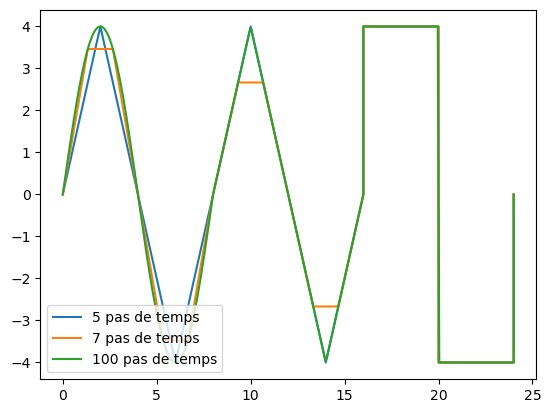

In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Création de signaux périodiques



On crée un signal périodique, qui retourne deux listes correspondant
au temps et à l'amplitude du signal.
Ensuite, celui-ci sera ajouté à la suite d'un dictionnaire contenant les clés  
`time` et `signal`.

Le but est ici d'avoir à la suite un signal triangulaire suivi d'un signal carré suivi d'une sinusoïde. 
Le signal final doit être continu (excepté aux dsicontinuité du signal carré).
"""

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math


def shift_time(liste_orig, time_values):
    """
    décale la liste time_values pour ajouter l'élément le plus grand de liste_orig 
    si celle-ci n'est pas vide
    - time_values : liste des temps pour le signal
    - liste_orig (list) : liste des temps déjà présents dans le signal
    retourne
    - une liste de temps translatée (liste)
    """
    if len(list(liste_orig)) > 0:
        shifted_time = []
        tmax = max(liste_orig)
        for t in time_values:
            shifted_time.append(t + tmax)
        return shifted_time
    else:
        return time_values


def concatenate_signal(signal_orig, new_signal):
    """
    Concatène les deux listes de new signal avec le dictionnaire signal_orig
    - signal_orig (dict) : dictionnaire avec une clé `time` contenant une liste de temps 
    et une clé `signal` qui contient une liste d'amplitudes
    - new_signal (tuple) : tuple dont le premier élément est une liste de temps 
    de type float et le deuxième une liste d'amplitudes de type float
    retourne :
    - un dictionnaire du même format que signal_orig
    """
    extended_signal = dict(time=signal_orig["time"], signal=signal_orig["signal"])
    extended_signal["time"].extend(new_signal[0])
    extended_signal["signal"].extend(new_signal[1])
    return extended_signal


def make_triangle(amplitude, period=1, steps=100, ts=None):
    """
    crée un signal triangulaire, retourne deux listes :
    - une liste avec les abscisses temporelles,  avec un décalage de l'abscisse temporelle pour le temps si nécessaire
    - l'autre avec le signal

    Paramètres :
    - amplitude (float) : amplitude du signal
    - period (float) : période du signal
    - steps (int) : nombre de pas pour l'échantillonage de la fonction
    - ts (list) :  liste à laquelle on va ajouter le signal
    """
    if ts is None:
        ts = []

    def triangle(t, period, amplitude):
        """
        Calcule l'amplitude d'un signal triangulaire
        - au temps `t` (float)
        - d'amplitude `amplitude` (float)
        - de période `period` (float)
        pour un signal triangulaire de période et d'amplitude donnée
        retourne la valeur du signal (float)
        """
        if t < period / 4:
            return amplitude * t / (period / 4)
        if t < 3 / 4 * period:
            return amplitude - 2 * amplitude * (t - period / 4) / (period / 2)
        else:
            return -amplitude + amplitude * (t - 3 / 4 * period) / (period / 4)

    # création de l'ensemble des abscisses temporelles
    time_values = np.linspace(0, period, steps)
    # amplitude du signal correspondant à chaque abscisse
    amplitudes = []
    # calcul de l'amplitude avec une fonction
    for t in time_values:
        amplitudes.append(triangle(t, period, amplitude))
    """"correction de l'abscisse temporelle pour ajouter un décalage temporel 
    correspondant au maximum de la liste `ts` fournie"""
    time_values = shift_time(ts, time_values)

    return time_values, amplitudes


def make_square(amplitude, period=1, steps=100, ts=None):
    """
    crée un signal rectangulaire, retourne deux listes :
    - une liste avec les abscisses temporelles,
    - l'autre avec le signal
    ces deux listes sont ajoutées aux listes `ts` et `signal`,
    avec un décalage de l'abscisse temporelle pour le temps si nécessaire

    Paramètres :
    - amplitude (float) : amplitude du signal
    - period (float) : période du signal
    - steps (int) : nombre de pas pour l'échantillonage de la fonction
    - ts (list) :  liste à laquelle on va ajouter le signal
    """
    if ts is None:
        ts = []

    # création de l'ensemble des abscisses temporelles
    if steps % 2 == 1:
        time_values = np.linspace(0, period / 2, steps // 2 + 1)
        time_values2 = np.linspace(period / 2, period, steps // 2 + 1)
        time_values = np.concatenate((time_values, time_values2, [period]))
    else:
        print("Attention, pour le créneau, le nombre de pas de temps devrait être impair")
        time_values = np.linspace(0, period, steps)
        time_values = np.concatenate(([0], time_values, [period]))
    amplitudes = []

    if steps % 2 == 0:
        amplitudes.append(0)
        for step in range(steps):
            if step < steps // 2:
                amplitudes.append(amplitude)
            else:
                amplitudes.append(-amplitude)
        amplitudes.append(0)
    else:
        for step in range(steps):
            if step < steps // 2:
                amplitudes.append(amplitude)
            elif step == steps // 2:
                amplitudes.append(amplitude)
                amplitudes.append(-amplitude)
            else:
                amplitudes.append(-amplitude)
        amplitudes.append(0)

    """"correction de l'abscisse temporelle pour ajouter un décalage temporel 
    correspondant au maximum de la liste `ts` fournie"""
    time_values = shift_time(ts, list(time_values))

    return time_values, amplitudes


def make_sinusoid(amplitude, period=1, steps=100, ts=None):
    """
    crée un signal sinusoïdal, retourne deux listes :
    - une liste avec les abscisses temporelles,
    - l'autre avec le signal
    ces deux listes sont ajoutées aux listes `ts` et `signal`,
    avec un décalage de l'abscisse temporelle pour le temps si nécessaire

    Paramètres :
    - amplitude (float) : amplitude du signal
    - period (float) : période du signal
    - steps (int) : nombre de pas pour l'échantillonage de la fonction
    - ts (list) :  liste à laquelle on va ajouter le signal
    """
    if ts is None:
        ts = []

    # création de l'ensemble des abscisses temporelles
    time_values = np.linspace(0, period, steps)

    # calcul de l'amplitude pour chacun des points
    amplitudes = amplitude * np.sin(time_values * 2 * np.pi / period)

    """"correction de l'abscisse temporelle pour ajouter un décalage temporel 
    correspondant au maximum de la liste `ts` fournie"""
    time_values = shift_time(ts, list(time_values))

    return time_values, amplitudes


if __name__ == "__main__":
    # Création du signal pour 5 pas de temps pour chaque période
    full_signal5 = dict(time=[], signal=[])
    full_signal5 = concatenate_signal(
        full_signal5, make_sinusoid(4, 8, 5, ts=full_signal5["time"])
    )
    full_signal5 = concatenate_signal(
        full_signal5, make_triangle(4, 8, 5, ts=full_signal5["time"])
    )
    full_signal5 = concatenate_signal(
        full_signal5, make_square(4, 8, 5, ts=full_signal5["time"])
    )

    # Création du signal pour 7 pas de temps pour chaque période
    full_signal7 = dict(time=[], signal=[])
    full_signal7 = concatenate_signal(
        full_signal7, make_sinusoid(4, 8, 7, ts=full_signal7["time"])
    )
    full_signal7 = concatenate_signal(
        full_signal7, make_triangle(4, 8, 7, ts=full_signal7["time"])
    )
    full_signal7 = concatenate_signal(
        full_signal7, make_square(4, 8, 7, ts=full_signal7["time"])
    )

    # Création du signal pour 100 pas de temps pour chaque période
    full_signal100 = dict(time=[], signal=[])
    full_signal100 = concatenate_signal(
        full_signal100, make_sinusoid(4, 8, 100, ts=full_signal100["time"])
    )
    full_signal100 = concatenate_signal(
        full_signal100, make_triangle(4, 8, 100, ts=full_signal100["time"])
    )
    full_signal100 = concatenate_signal(
        full_signal100, make_square(4, 8, 100, ts=full_signal100["time"])
    )

    # Affichage du signal final
    plt.plot(full_signal5["time"], full_signal5["signal"], label="5 pas de temps")
    plt.plot(full_signal7["time"], full_signal7["signal"], label="7 pas de temps")
    plt.plot(full_signal100["time"], full_signal100["signal"], label="100 pas de temps")
    plt.legend(loc="lower left")
    plt.show()